Columns in the dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Unique values in 'target': [0 1]
Any NaN in dataset: False
X_train_data shape: (820, 14)
y_train_data shape: (820,)
y_train_data unique values: [1 0]
X_train_data min/max: -3.7460702934952015 6.166694240617154


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 46 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   -0.004  0.064  -0.129    0.113      0.001    0.002    3438.0   
betas[1]   -0.090  0.068  -0.221    0.035      0.001    0.002    2619.0   
betas[2]   -0.372  0.067  -0.501   -0.251      0.001    0.002    3155.0   
betas[3]    0.441  0.067   0.321    0.566      0.001    0.001    2835.0   
betas[4]   -0.100  0.068  -0.220    0.031      0.001    0.002    3454.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[815]  0.855  0.025   0.806    0.897      0.000    0.001    3072.0   
theta[816]  0.649  0.042   0.569    0.723      0.001    0.001    2580.0   
theta[817]  0.890  0.018   0.857    0.924      0.000    0.000    2578.0   
theta[818]  0.236  0.057   0.131    0.338      0.001    0.001    3364.0   
theta[819]  0.642  0.060   0.533    0.753      0.001    0.001    3193.0   

            ess_tail  r_hat  
betas[0]      1436.0    1.0  
betas[1]      1554.0    1.0  
betas[2] 

/opt/conda/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (834) in plot_posterior, generating only 40 plots
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1668) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\n0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1'}>,
        <Axes: title={'center': 'betas\n0, 2'}>,
        <Axes: title={'center': 'betas\n0, 3'}>],
       [<Axes: title={'center': 'betas\n0, 4'}>,
        <Axes: title={'center': 'betas\n0, 5'}>,
        <Axes: title={'center': 'betas\n0, 6'}>,
        <Axes: title={'center': 'betas\n0, 7'}>],
       [<Axes: title={'center': 'betas\n0, 8'}>,
        <Axes: title={'center': 'betas\n0, 9'}>,
        <Axes: title={'center': 'betas\n0, 10'}>,
        <Axes: title={'center': 'betas\n0, 11'}>],
       [<Axes: title={'center': 'betas\n0, 12'}>,
        <Axes: title={'center': 'betas\n0, 13'}>,
        <Axes: title={'center': 'betas\n1, 0'}>,
        <Axes: title={'center': 'betas\n1, 1'}>],
       [<Axes: title={'center': 'betas\n1, 2'}>,
        <Axes: title={'center': 'betas\n1, 3'}>,
        <Axes: title={'center': 'betas\n1, 4'}>,
        <Axes: title={'center': 'betas\n1, 5'}>],
       [<Ax

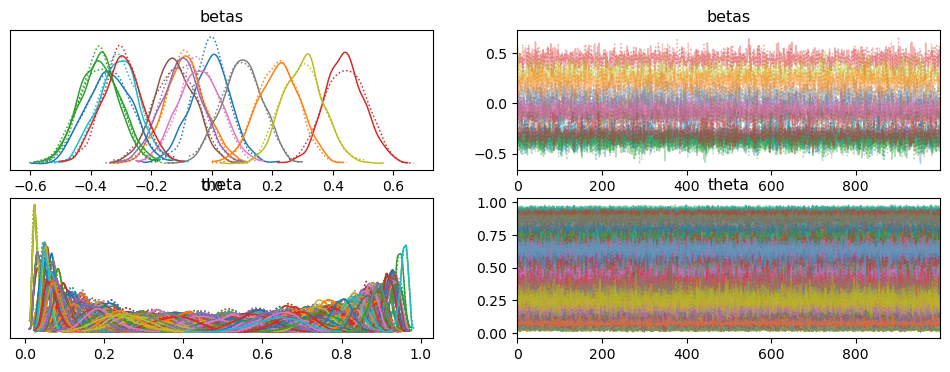

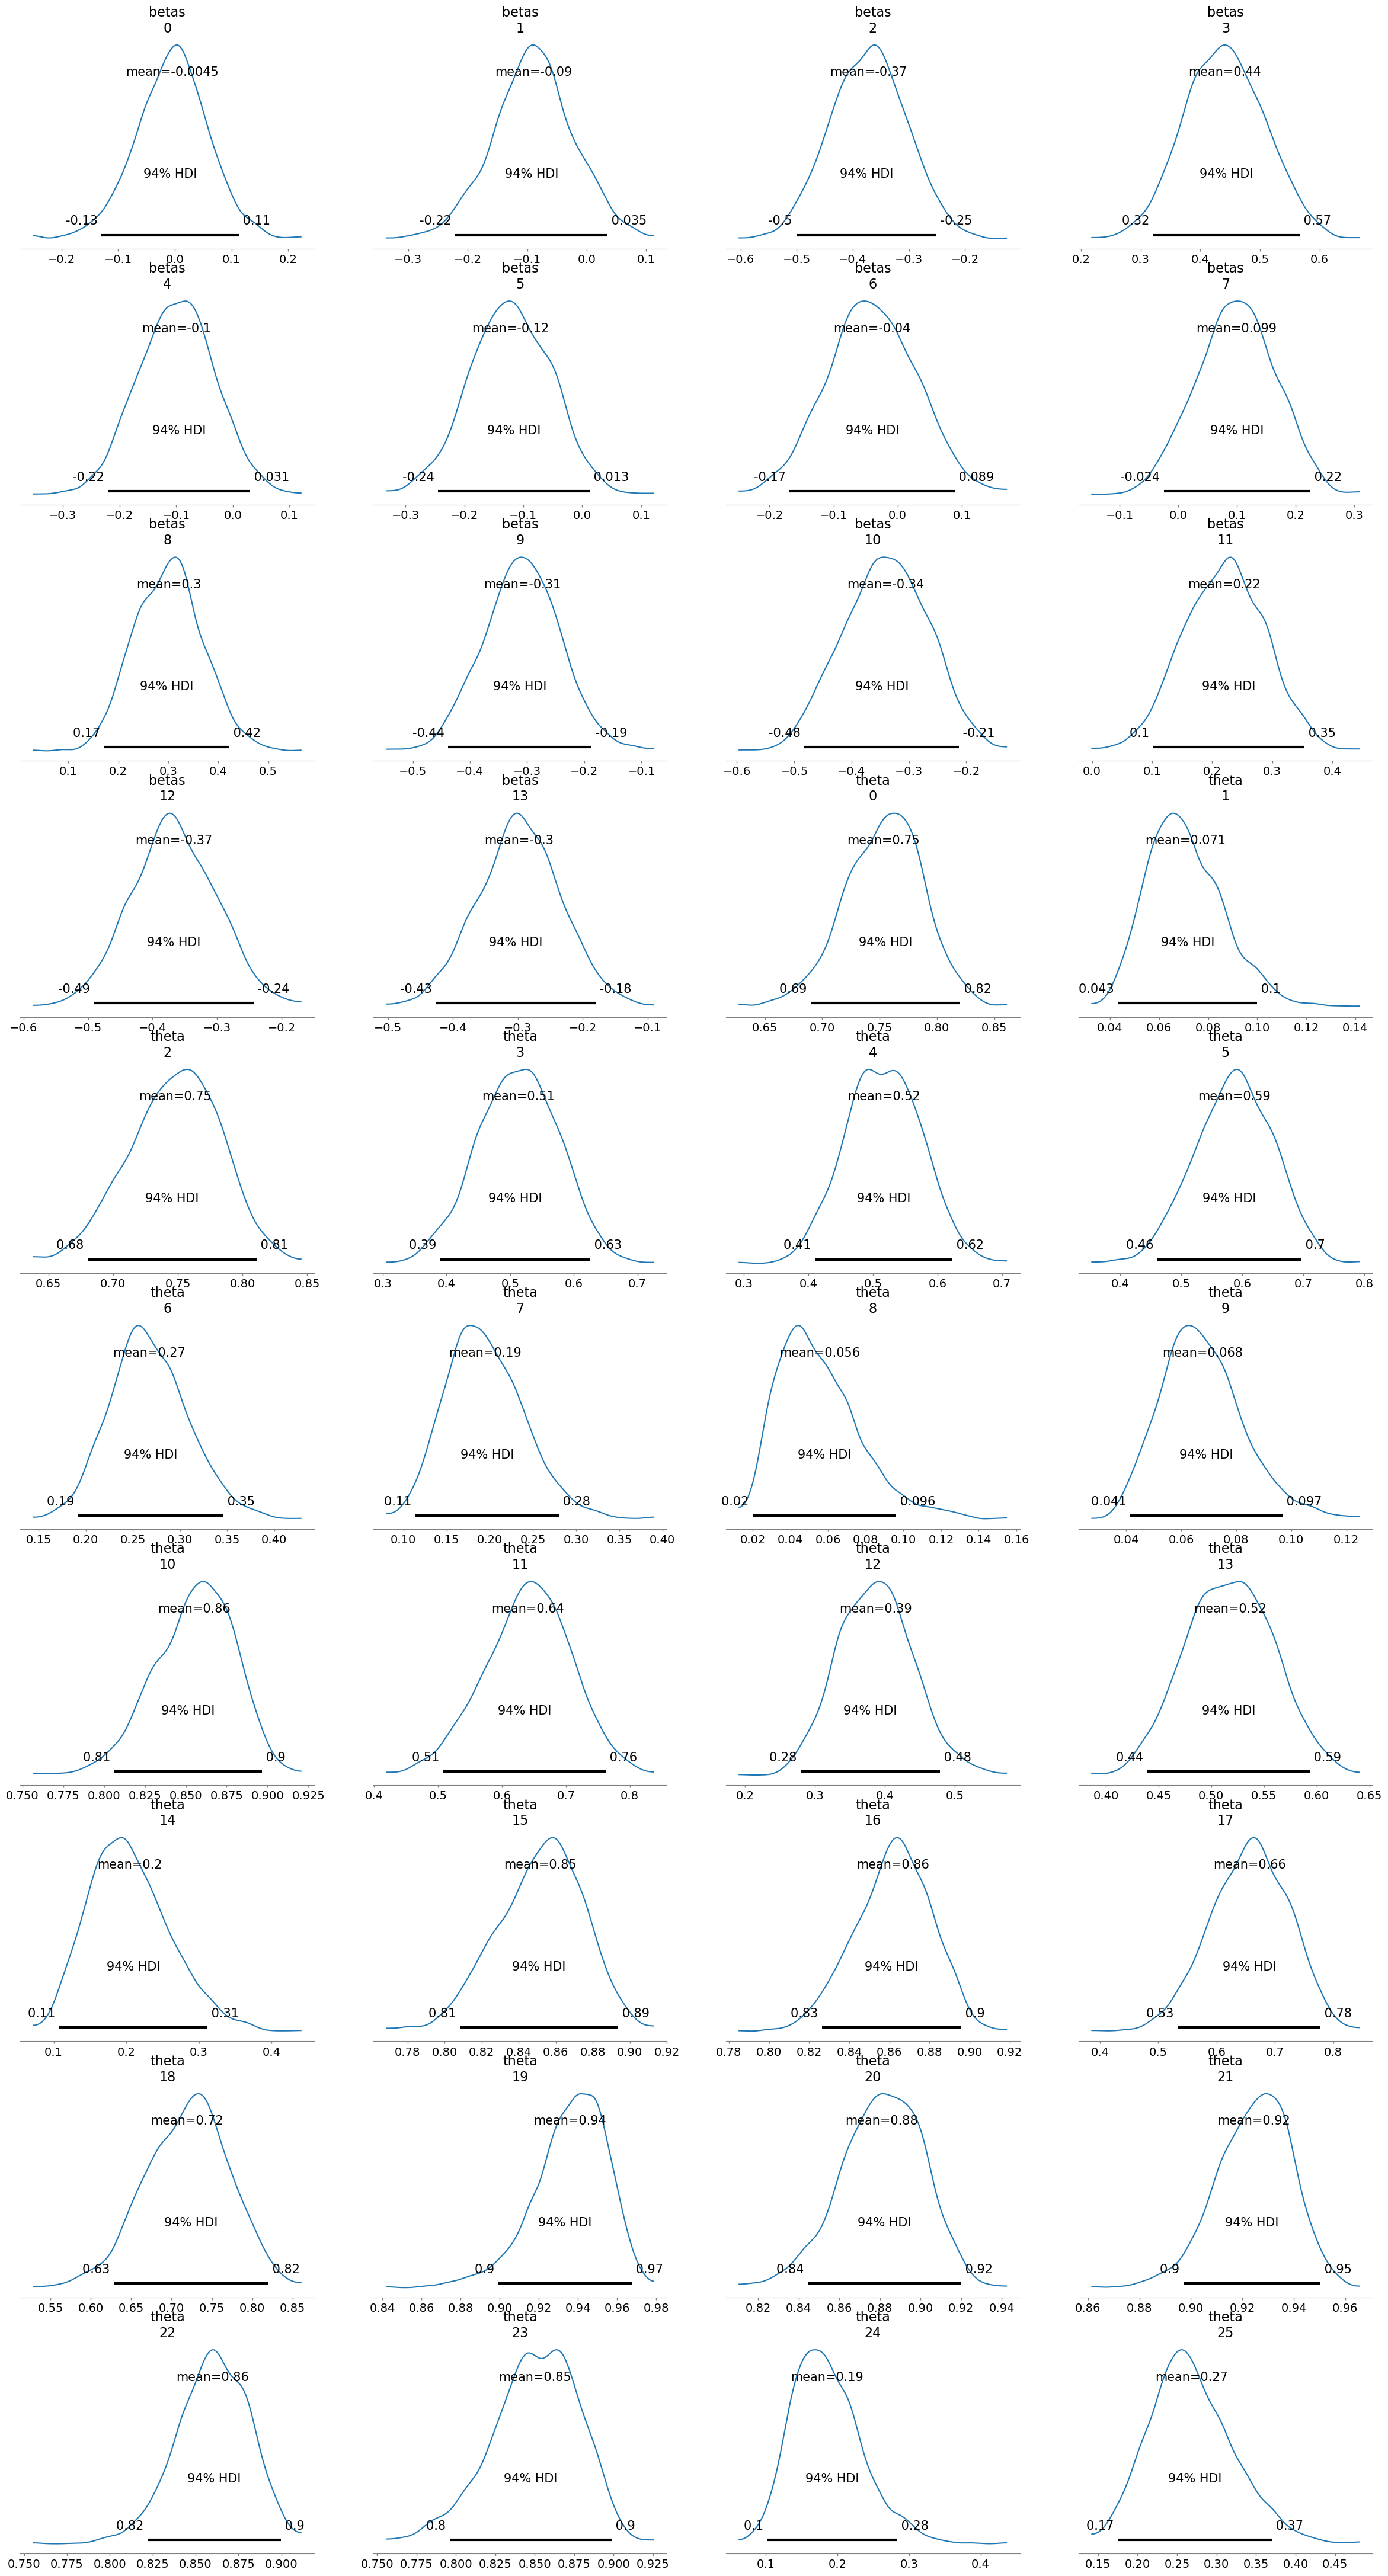

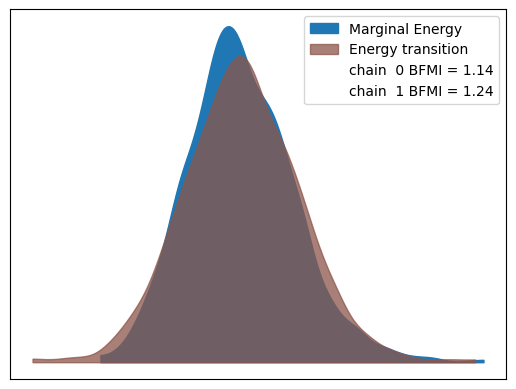

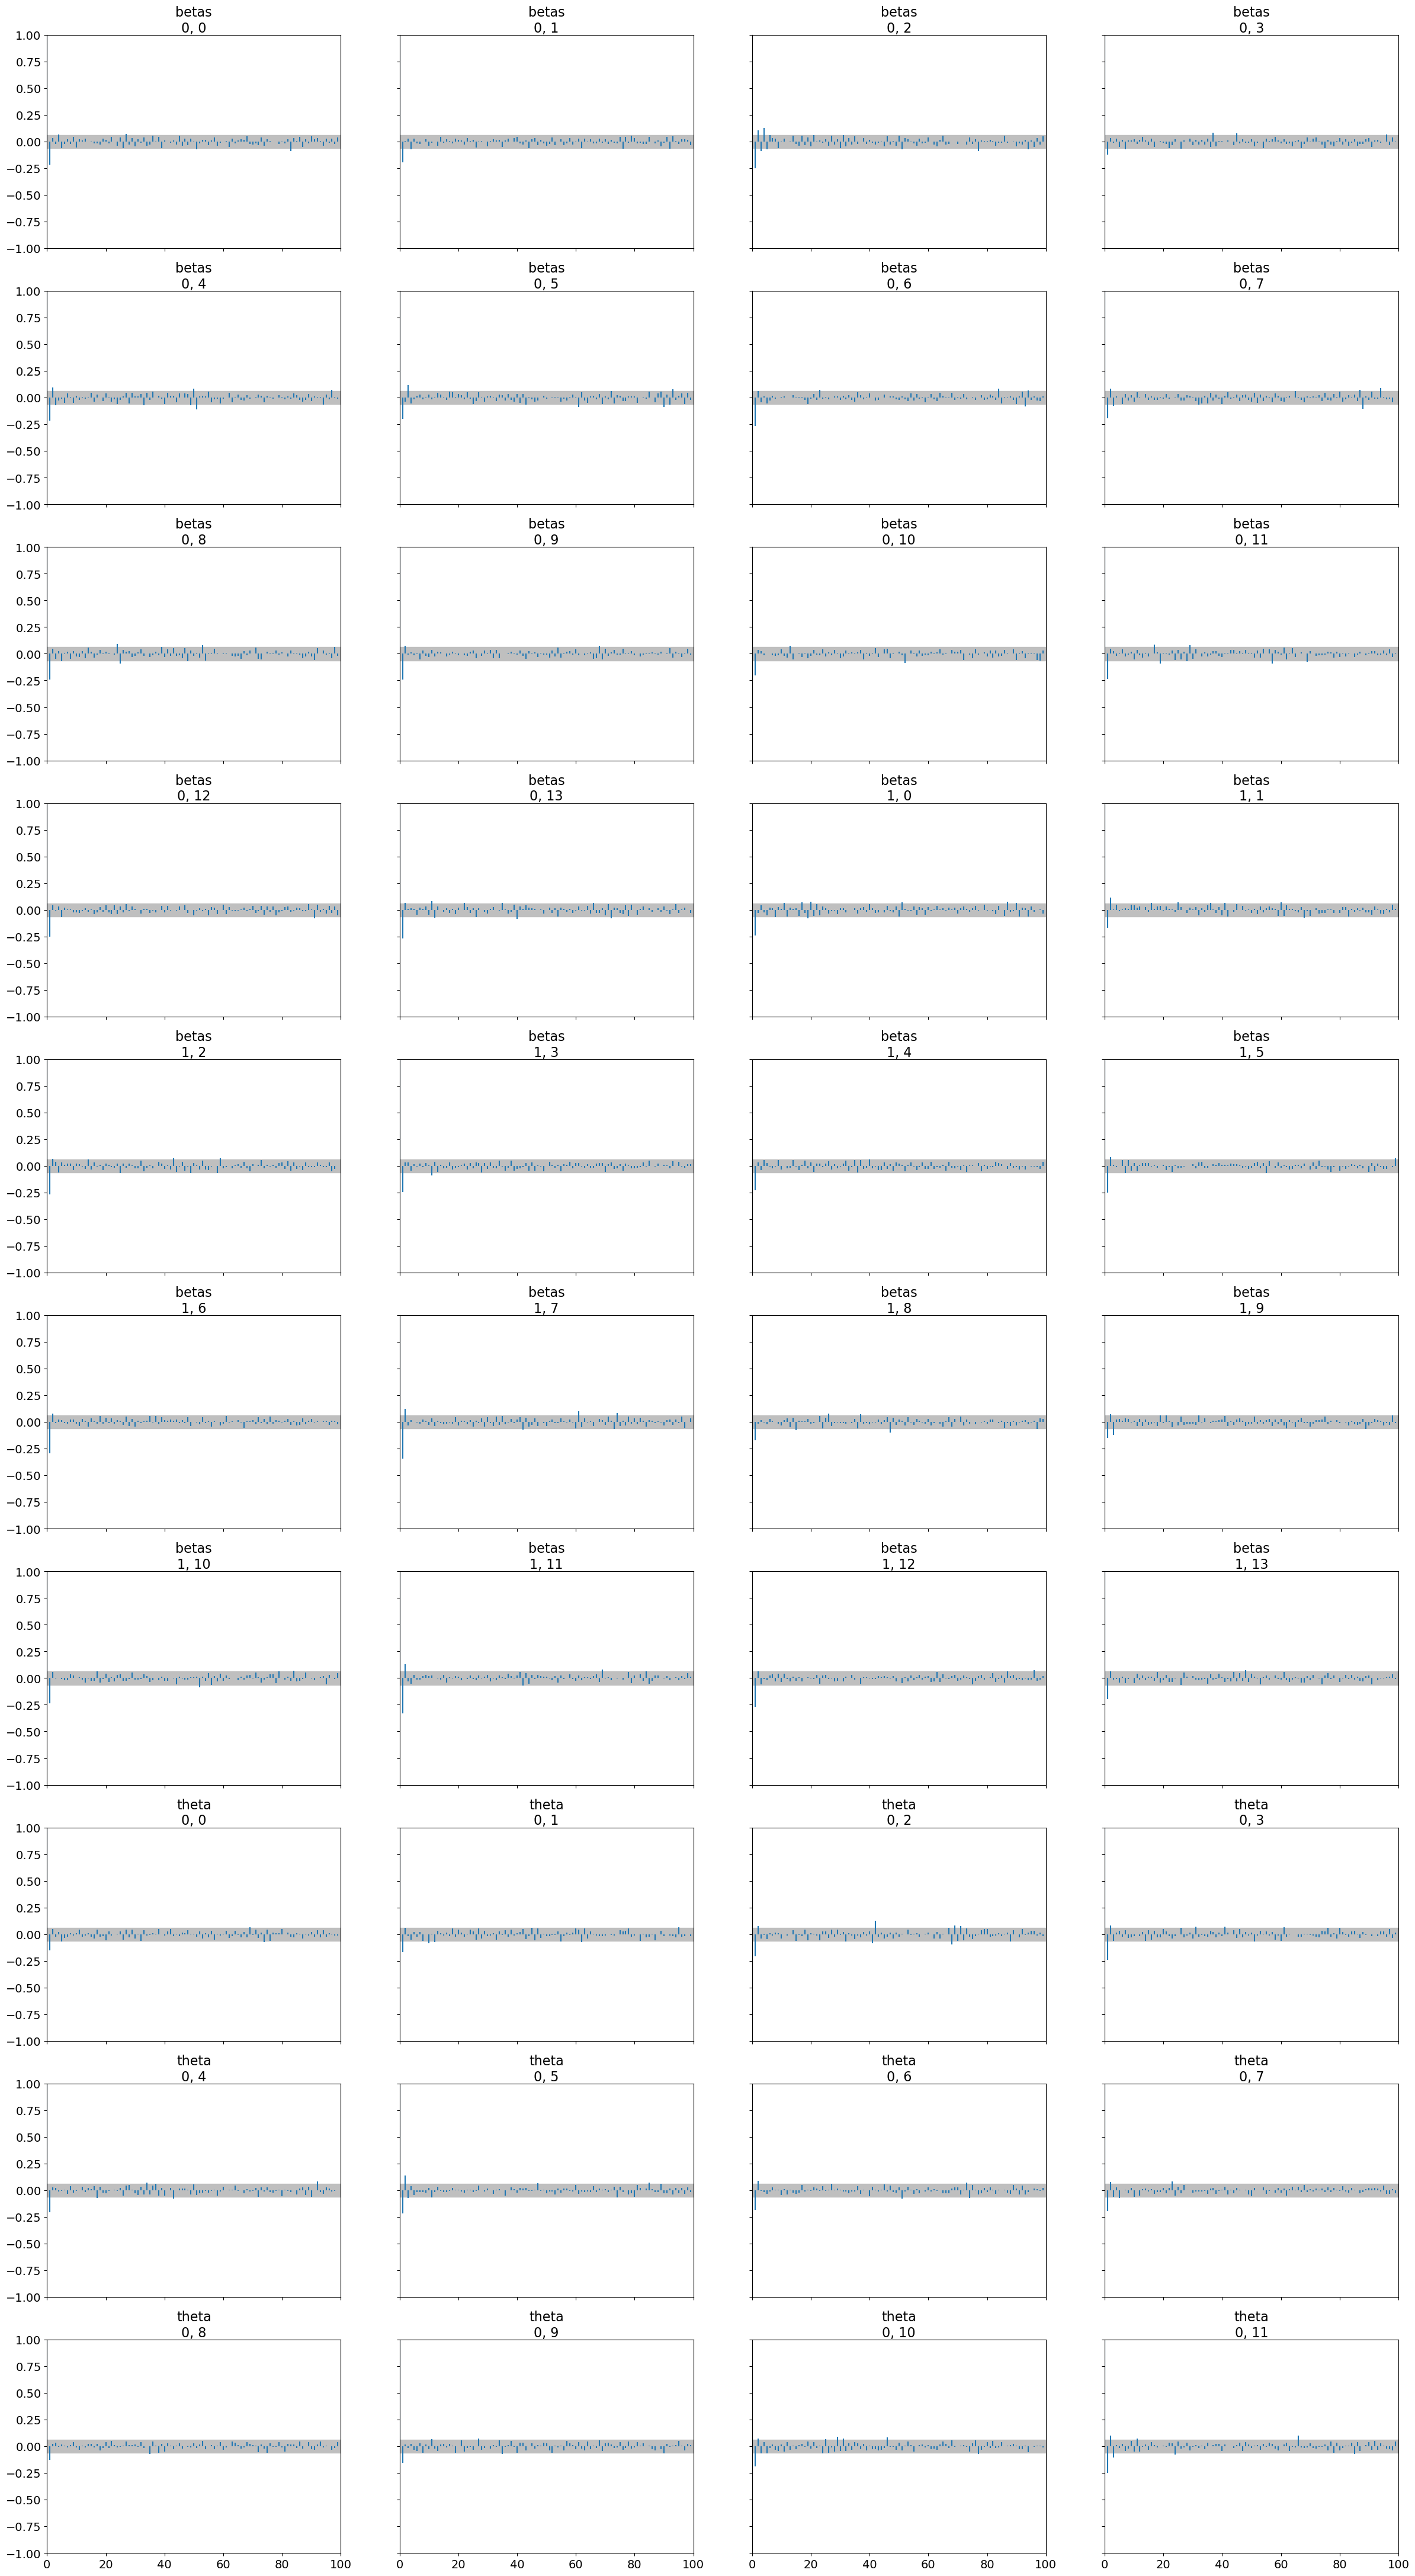

In [18]:
#Q1
# My dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
print("Columns in the dataset:", df.columns.tolist())
print("Unique values in 'target':", df['target'].unique())
print("Any NaN in dataset:", df.isna().any().any())

encoded_df = df.copy()

scaler = StandardScaler()
feature_columns = encoded_df.drop(columns=['target']).columns
encoded_df[feature_columns] = scaler.fit_transform(encoded_df[feature_columns])

X_data = encoded_df.drop(columns=['target'])
y_data = encoded_df['target']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_data, y_data, test_size=0.2, random_state=1008111151
)

X_train_data = np.c_[np.ones(X_train_data.shape[0]), X_train_data]

print("X_train_data shape:", X_train_data.shape)
print("y_train_data shape:", y_train_data.shape)
print("y_train_data unique values:", y_train_data.unique())
print("X_train_data min/max:", X_train_data.min(), X_train_data.max())


with pm.Model() as logistic_regression_model:

    betas = pm.Normal('betas', mu=0, sigma=0.1, shape=X_train_data.shape[1])
    
    linear_predictor = pm.math.dot(X_train_data, betas)
    
    theta = pm.Deterministic('theta', pm.math.sigmoid(linear_predictor))    

    y_obs = pm.Bernoulli('y_obs', p=theta, observed=y_train_data)
    
    trace = pm.sample(
        1000, 
        tune=1000, 
        cores=2, 
        random_seed=1008111151,
        initvals={'betas': np.zeros(X_train_data.shape[1])}
    )


posterior_summary = az.summary(trace)
print(posterior_summary)


az.plot_trace(trace)
az.plot_posterior(trace)
az.plot_energy(trace)
az.plot_autocorr(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [regression_betas]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
regression_betas[0] -0.013  0.237  -0.476    0.404      0.005    0.005   
regression_betas[1] -0.050  0.296  -0.586    0.510      0.008    0.006   
regression_betas[2]  0.978  0.287   0.427    1.506      0.008    0.005   

                     ess_bulk  ess_tail  r_hat  
regression_betas[0]    1950.0    1609.0    1.0  
regression_betas[1]    1372.0    1325.0    1.0  
regression_betas[2]    1280.0    1464.0    1.0  


array([[<Axes: title={'center': 'regression_betas\n0, 0'}>,
        <Axes: title={'center': 'regression_betas\n0, 1'}>,
        <Axes: title={'center': 'regression_betas\n0, 2'}>],
       [<Axes: title={'center': 'regression_betas\n1, 0'}>,
        <Axes: title={'center': 'regression_betas\n1, 1'}>,
        <Axes: title={'center': 'regression_betas\n1, 2'}>]], dtype=object)

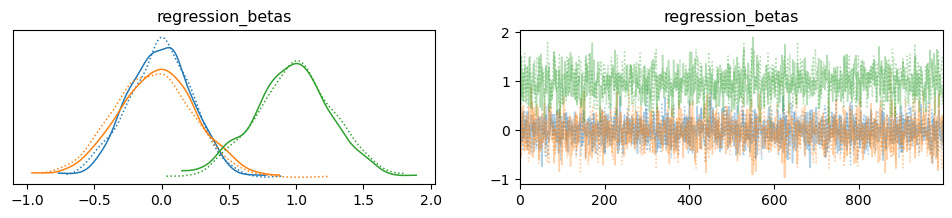

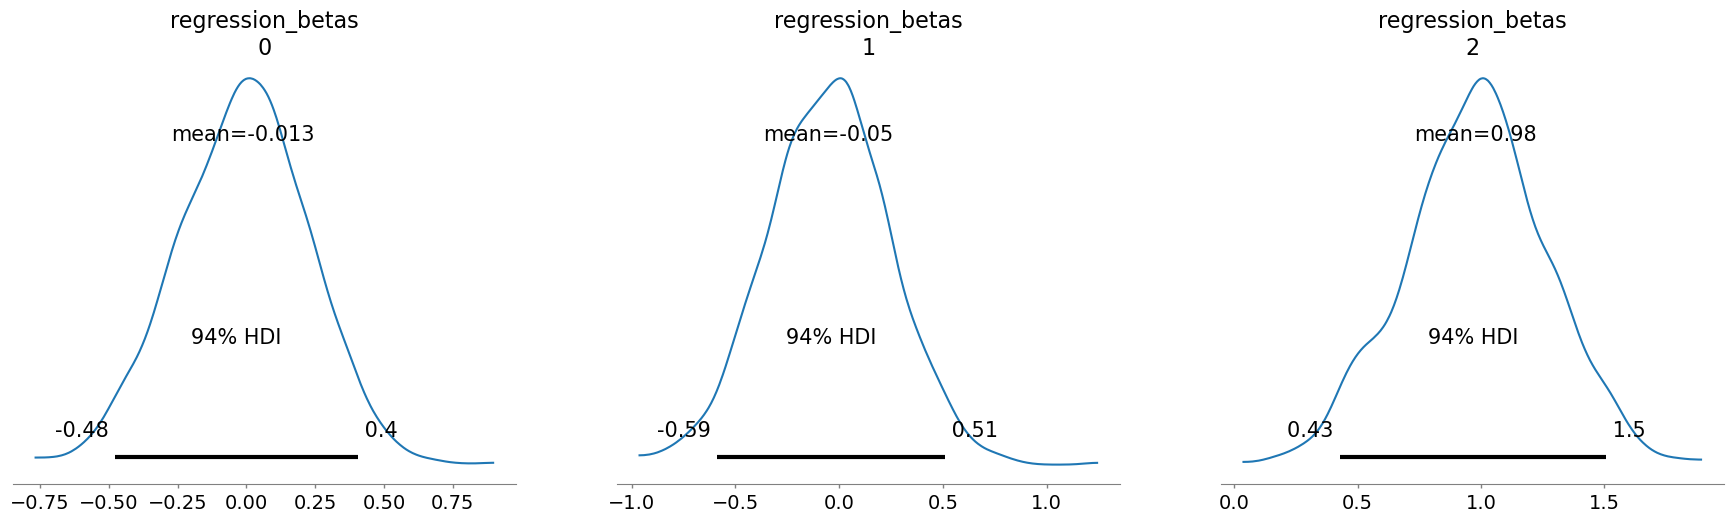

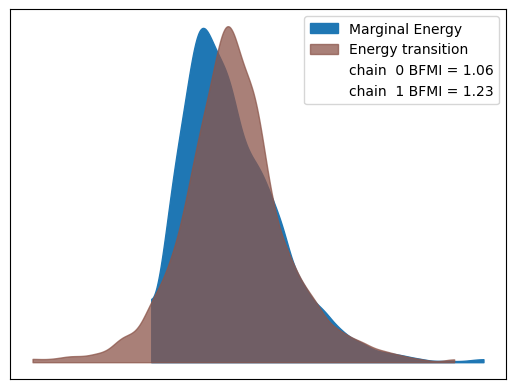

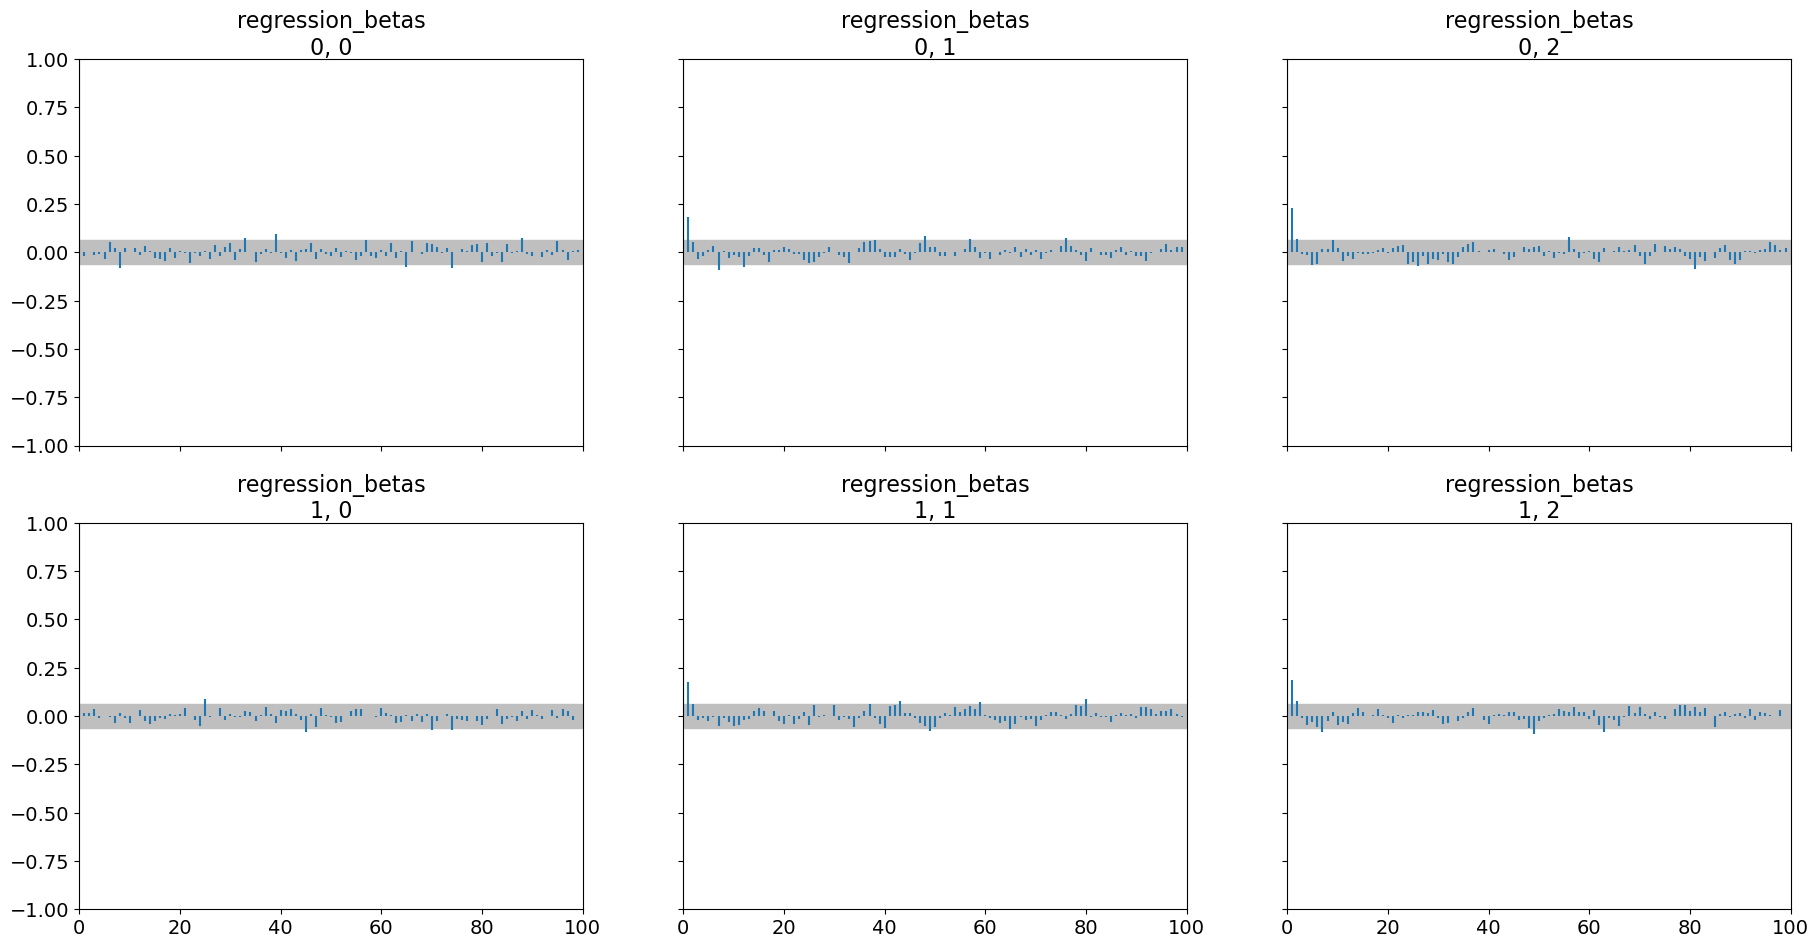

In [8]:
#Q2
# My dataset: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('multiple_linear_regression_dataset.csv')
df_clean = df.dropna()


scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_clean)
scaled_df = pd.DataFrame(features_scaled, columns=df_clean.columns)


X_data = scaled_df.drop(columns=['income'])
y_data = scaled_df['income']


X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    X_data, y_data, test_size=0.2, random_state=1008111151
)


X_train_set = np.c_[np.ones(X_train_set.shape[0]), X_train_set]
n_params = X_train_set.shape[1]

with pm.Model() as model:

    regression_betas = pm.Normal('regression_betas', mu=0, sigma=1, shape=n_params)
    

    linear_model = pm.math.dot(X_train_set, regression_betas)


    target_distribution = pm.Normal(
        'target_distribution', mu=linear_model, sigma=1, observed=y_train_set
    )

    posterior_trace = pm.sample(1000, tune=1000, cores=2, random_seed=1008111151)


trace_summary = az.summary(posterior_trace)
print(trace_summary)

az.plot_trace(posterior_trace)
az.plot_posterior(posterior_trace)
az.plot_energy(posterior_trace)
az.plot_autocorr(posterior_trace)


In [ ]:
#Q3
# My dataset: https://www.kaggle.com/datasets/mahatiratusher/heart-disease-risk-prediction-dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

encoded_df = df.copy()
categorical_columns = encoded_df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for column in categorical_columns:
    encoded_df[column] = encoder.fit_transform(encoded_df[column])

scaler = StandardScaler()
numerical_columns = encoded_df.select_dtypes(include=['int64', 'float64']).columns
target_columns = ['Heart_Risk', 'Chest_Pain', 'Smoking']
numerical_features = [col for col in numerical_columns if col not in target_columns]
encoded_df[numerical_features] = scaler.fit_transform(encoded_df[numerical_features])

print("Unique values in raw targets (before scaling):")
print(df[target_columns].agg(['unique']))
print("Unique values in encoded_df targets (after processing):")
print(encoded_df[target_columns].agg(['unique']))

X_data = encoded_df.drop(columns=target_columns)
y_data = encoded_df[target_columns]

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_data, y_data, test_size=0.2, random_state=1008111151
)

X_train_data = np.concatenate([np.ones((X_train_data.shape[0], 1)), X_train_data], axis=1)
n_features = X_train_data.shape[1]
n_targets = y_train_data.shape[1]

print("Any NaN in X_train_data:", np.any(np.isnan(X_train_data)))
print("Any NaN in y_train_data:", np.any(np.isnan(y_train_data.values)))
print("y_train_data unique values:")
print(np.unique(y_train_data.values))

with pm.Model() as multivariate_classification_model:
    betas = pm.Normal('betas', mu=0, sigma=0.5, shape=(n_features, n_targets))
    
    linear_combination = pm.math.dot(X_train_data, betas)
    
    theta = pm.Deterministic('theta', pm.math.clip(pm.math.sigmoid(linear_combination), 0.01, 0.99))
    
    y_obs = pm.Bernoulli('y_obs', p=theta, observed=y_train_data.values)
    
    trace = pm.sample(
        1000,
        tune=1000,
        cores=2,
        random_seed=1008111151,
        target_accept=0.95,
        initvals={'betas': np.zeros((n_features, n_targets))}
    )

summary = az.summary(trace, hdi_prob=0.95)
print(summary)

az.plot_trace(trace, compact=True)
plt.tight_layout()

az.plot_posterior(trace, hdi_prob=0.95)
plt.tight_layout()

az.plot_energy(trace)
plt.tight_layout()

az.plot_autocorr(trace, max_lag=20)
plt.tight_layout()

plt.show()



Unique values in raw targets (before scaling):
        Heart_Risk  Chest_Pain     Smoking
unique  [0.0, 1.0]  [0.0, 1.0]  [1.0, 0.0]
Unique values in encoded_df targets (after processing):
        Heart_Risk  Chest_Pain     Smoking
unique  [0.0, 1.0]  [0.0, 1.0]  [1.0, 0.0]
Any NaN in X_train_data: False
Any NaN in y_train_data: False
y_train_data unique values:
[0. 1.]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas]
